<a href="https://colab.research.google.com/github/joserobertofox/datascience/blob/main/MVP3_Engenharia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP3 - Engenharia de Dados**
## **Aluno: José Roberto Assis Silva**
## **RA: 4052023000345**

## **1. Objetivo**#

Foi criada uma campanha para premiar os vendedores de equipamentos da empresa em que trabalho como Administrador de Dados. Esta campanha têm quatro objetivos  e vou tratar um deles neste MVP coletando dados de nosso ERP, que utiliza um banco de dados relacional (SGDB ORACLE). Um dos objetivos desta campanha, que tratarei aqui, é rankear os vendedores por total de equipamentos vendidos e a partir destes dados será feita uma premiação para o primeiro, segundo e terceiro colocados. Esta campanha utilizará apenas dados do ano de 2023, mas vou gerar os CSVs com todas as informações de vendas em nosso database para criar meu dataset. A visualização destas informações, a partir destes dados, deverá ser um dashboard mostrando um grid com ranking dos vendedores por grupo de equipamentos e totais gerais e também um gráfico rankeando os vendedores com suas respectivas quantidades totais vendidas. Neste dasboard devemos ter filtro por loja e data. A partir do database (Oracle) vou criar algumas queries para gerar alguns arquivos CSVs e vou utilizá los para carga na nuvem Azure para fazer ETL e posteriormente criar o painel. Vou mudar algumas descrições nos CSVs para manter a confidencialidade dos dados. Os CSVs foram gerados a partir de uma conexaão feita com o database utilizando o Dbeaver e queries SQL.




## **2. Busca pelos Dados**#

Vou utilizar uma conexão com o banco de dados oracle utilizando o Dbeaver para
gerar os CSVs que faram parte do meu dataset. Como conhecedor do database que utilizamos, criei algumas queries, com visões temporárias, joins e filtros para gerar um CSV com itens vendidos apenas de EQUIPAMENTOS, porque também trabalhamos com outras linhas de produtos. Vou gerar também CSVs de algumas tabelas dimensões, as quais utilizarei quando criar o pipeline no azure, fazendo alguns joins para gerar uma tabela fato VENDAS não **normalizada**. Farei alterações em algumas descrições preservando a confidencialidade dos dados e também inibirei alguns dados nas imagens. Serão gerados os seguites CSVs:


1.   VENDAS.csv (Contém os atributos das vendas)
2.   LOJAS.csv (Contém os atributos das lojas)
3.   GRUPOSEQP (Contém os atributos dos grupos dos equipamentos)





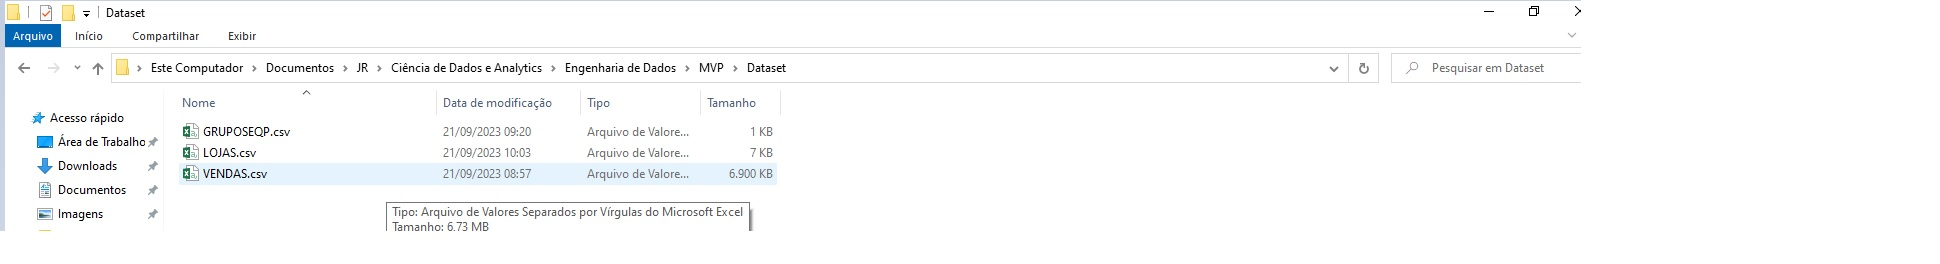

### 2.1. Executando query e gerando CSV VENDAS

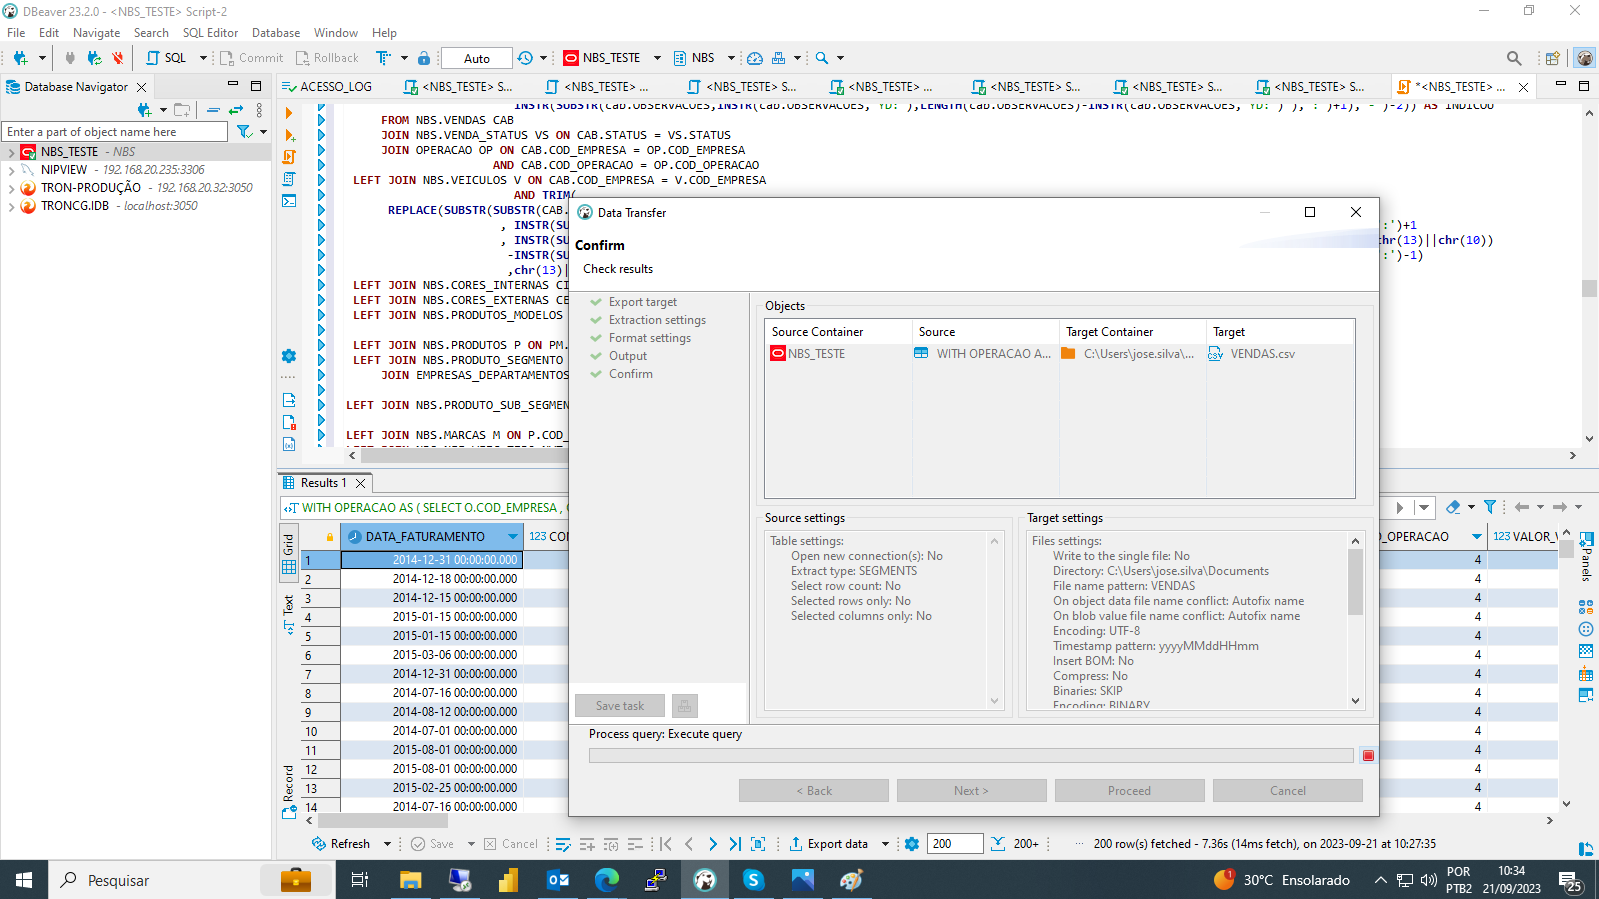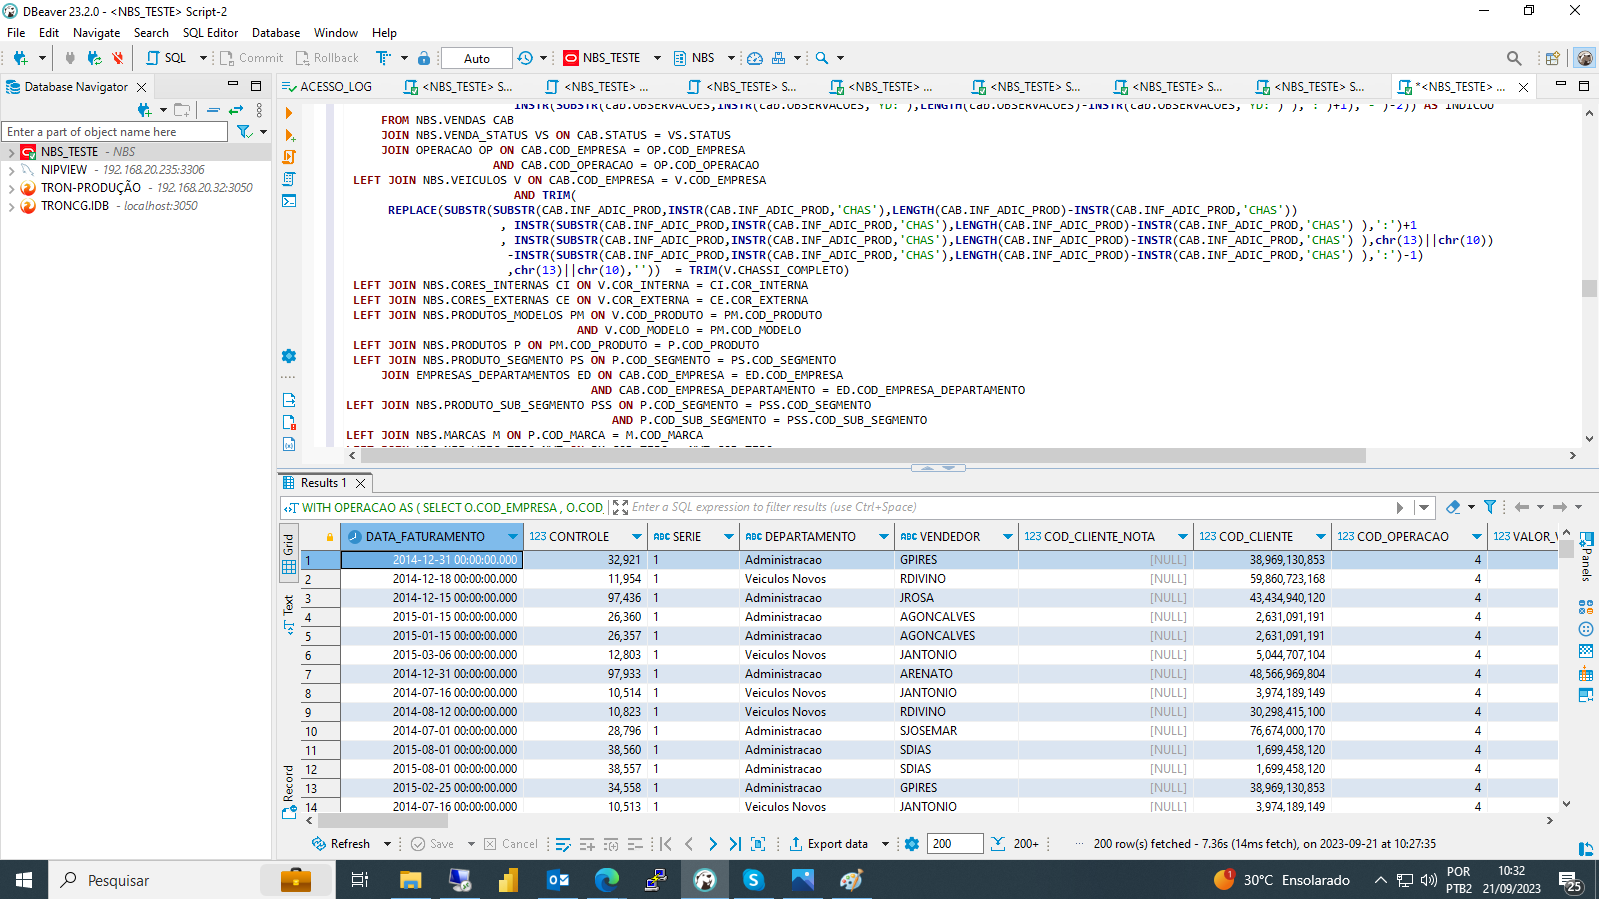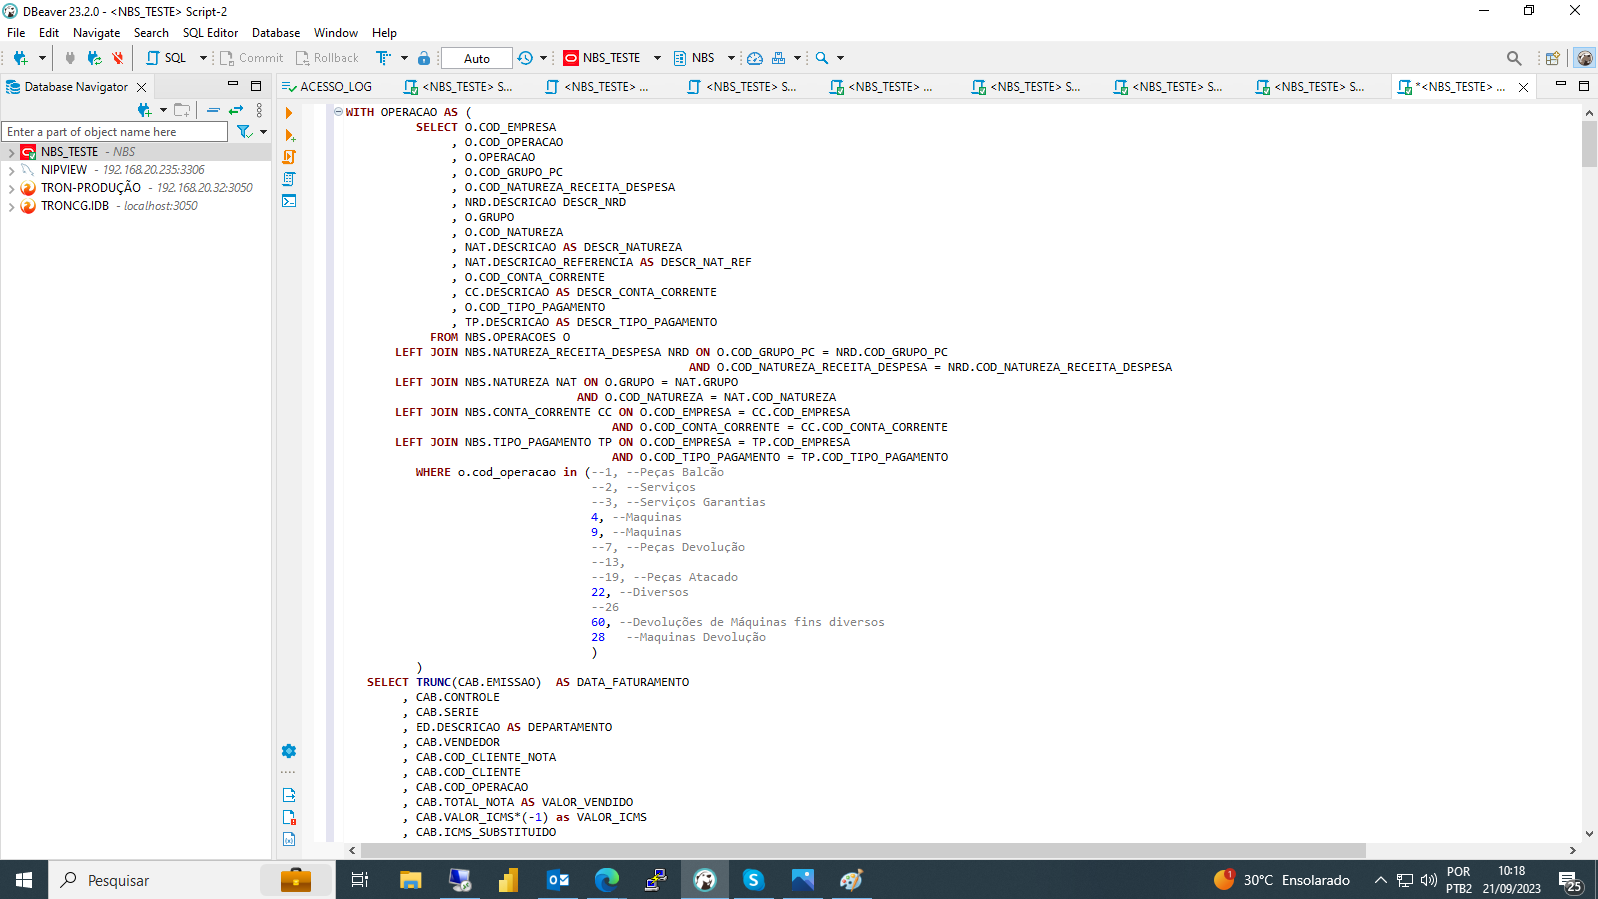

### 2.2. Executando query e gerando CSV GRUPOSEQP

### 2.3. Executando query e gerando CSV LOJAS

## **3. Coleta dos Dados**


### 3.1. Carregandos os CSVs para o Azure

Os dados estão na máquina local e vão ser inseridos no Azure

#### 3.1.1 Codificação Ordinal

### 3.3. Separação em Conjunto de Treino e Conjunto de Teste com Holdout
Vou utilizar uma técnica de amostragem usando um conjunto teste ou conjunto de validação que é uma amostra de dados que não será utilizada na construção do modelo final. Será utilizada somente no final para validar se a construção do modelo foi bem sucedida e também para termos uma análise do modelo com dados ainda não utilizados. Criarei um conjunto de dados com 80% do dataset para criarmos o modelo e guardarei 20% para teste de validação, usando a estratégia train-test-split. Primeiramente iremos sinalizar quais são as colunas de atributos (X - 1 a 12) e qual é a coluna da classe alvo (Y - 0). Em seguida, especificaremos o tamanho do conjunto de teste desejado e uma semente. Finalmente, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.

### 3.4. Validação Cruzada - Cross Validation
Definiremos abaixo os parâmetros e número de partições da validação cruzada. Utilizando este método poderemos lidar com o DILEMA BIAS x VARIÂNCIA para manter o equilíbrio entre underfitting e overfitting, estimando o desempenho de generalização do modelo não apenas uma vez (como no holdout), mas diversas vezes (k) definido no parâmento num-particoes.

### 3.5. Feature Selection

Considerando que este processo consiste na seleção de atributos que mais contribuem para a classe target, vou efetuar algumas operações na base teste para averiguar se existem atributos irrelevantes e com pouca importância, reduzindo o número de varíaveis de entrada do modelo. Desta forma contribuímos para  trabalharmos com dados menos redundantes evitando o OVERFITTING, com dados mais relevantes contribuindo para a precisão do modelo e com menos dados temos um treinamento mais rápido e melhor entendimento do processo que gerou os dados e melhor entendimento do resultado gerado pelo modelo. Vou utilizar três métodos de seleção de atributos abaixo.

#### 3.5.1. Seleção Univarida
Este método é aplicado com a classe SelectKBest e pode ser usado com diversos testes estatísticos para selecionar os atributos mais relevantes. Aqui vamos usar o teste ANOVA F-Value para selecionar os quatro melhores atributos que podem ser usados como varíaveis preditoras. O teste ANOVA F-Value estima o quanto cada característica distinta de X é dependente da classe Y. Este teste é adequado para nosso dataset porque temos uma variável categórica de saida e as variáveis de entrada numéricas.

#### 3.5.2. Eliminação Recursiva de Atributos

Vamos utilizar o algorítimo de Regressão Logística para selecionar as 4 melhores variáveis preditoras. Vamos verificar que alguns atributos selecionados usando este método são diferentes do método anterior.

#### 3.5.3. Classificador ExtraTrees

Vamos construir um classificador ExtraTrees para calcular a importância dos atributos e posteriormente selecionar quais iremos utilizar. Neste modelo não selecionamos uma quantidade específica de atributos que queremos fazer a Feature Selection, mas podemos escolher os atributos que tiveram maior pontuação.

Executamos três técnicas de seleção de atributos e vericamos uma distinção entre elas. Vou começar a etapa de Modelagem e Inferência com todos os atributos do Dataset. Sendo assim não reduzieri atributos do Dataset para fazer a modelagem e Inferência.

## **4. Modelagem e Inferência**

### 4.1. Criação e Avaliação de Modelos sem os Algorítimos de Ensembles

Verificamos que o melhor resultado de acurácia média foi estabelecida pelo algorítimo Naive Bayes (91,29% de acurácia média e 4,8% de desvio padrão) o qual seria escolhido para seguirmos com o modelo. Vou construir, abaixo, um novo modelo treinado com toda a base de treino e depois será avaliado com a base teste.

Foi obtida uma acurácia de 87,80% com o algorítimo Naive Bayes fazendo predições no conjunto teste. Chegamos a conclusão que o modelo capturou bem as regularidades dos dados de treinamento mas generalizou para os dados do conjunto teste (Desconhecidos) não ocorrendo o OVERFITTING. Notamos que não  faltou complexidade no modelo para o problema envitando também o UNDERFITTING.

### 4.2. Criação e Avaliação de Modelos Incluindo Algorítimos Ensembles

Vou agora criar e avaliar modelos incluindo os recursos avançados que são os algorítimos Ensembles utilizados em Machine Learning.

Notamos que após a inclusão na avaliação dos algorítimos Ensembles o algorítimo Gradient Boosting obteve a melhor acurácia de 93,29%. Este algorítimo cria uma sequência de modelos na qual um modelo tenta corrigir os erros do modelo anterior. Seria este modelo que iríamos seguir com ele.

### 4.3. Criação e Avaliação de Modelos com Dados Padronizados e Normalizados

Vou utilizar a biblioteca Pipeline para criar e avaliar os modelos através da validação cruzada com os dados padronizados e normalizados
(evitando o data leakage). Depois compararemos os resultados obtidos dos modelos treinados com normalização e pardronização com os modelos treinados com o dataset original.

Avaliando os resultados chegamos a conclusão que houve uma igualdade entre o modelos com dados originais que utilizou o algorítimo Gradient Boosting e o modelo com dados padronizados que utilizou o algorítimo Gradient Boosting (0.933), sendo este modelos que obtiveram a melhor acurácia. Houve também uma equivalência entre os dois modelos citados e o modelo com dados normalizados que utilizou o algorítimo Gradient Boosting (0.931). Chegamos a conclusão que este algorítimo se sobressaiu em uma análise dentro mesmo tipo de dados e também na análise do conjunto total de dados (Padrão, Normalizados e Padronizados). Posteriormente vou finalizar o modelo.



### 4.4. Otimização de Hiperparâmetros

Tomando como base que o Algorítimo Gradient Boosting foi o melhor modelo, vamos utilizar a biblioteca Grid Search para variar alguns hiperparâmetros e fazer uma avaliação. Também vamos variar alguns hiperparâmetros do algorítmo KNN.

#### 4.4.1. Variação de Hiperparâmetros Gradient Boosting

Com a variação de hiperparâmentros verificamos que houve pouquíssimo aumento, mas se continuássemos estas variação talvez conseguiríamos melhorar a acurácia.

#### 4.4.2. Variação de Hiperparâmetros KNN

No algorítimo KNN verificamos que o modelo obteve uma acurácia melhor variando os hiperparâmentos, em relação aos valores obtidos anteriormente, mas não superou Gradiente Boosting.

## **5. Finalização do Modelo**

Finalizaremos agora o modelo Gradient Boosting que foi o modelo com maior acurácia e vamos treina-lo em todo conjunto de dados de treinamento (sem validação cruzada) e faremos predições para o conjunto de dados de teste que são os dados não conhecidos pelo modelo para confirmarmos os resultados.

Chegamos a 87.88% com dados não vistos.

## **6. Simulando a Aplicação do Modelo com Dados Não Vistos**

Foram feitas as predições e avaliando os valores não vistos verifiquei que os resultados estão de acordo com a acurácia do modelo.